In [2]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

## Data obtaining

In [3]:
housing_df = pd.read_csv("housing.csv", delimiter="\s+", header=None)

In [4]:
# crim = criminal rate
# size = house size
# pIndustries = Industries around the place
# river = If terrain follows a river
# nox = concentration of nitrogen
# rooms = average rooms
# age = proportion of used
# dis = distance to Boston employment centers
# rad = accessibility to radial highways
# tax = tax
# pRatio = Proportion in area
# bRatio = Proportion of blacks in area
# lstat = lower status of population
# medv = median value of owner occupied houses
housing_df.columns = ["crim", "size", "pIndustries", "river", "nox", "rooms", "age", "dis", "rad", "tax", "pRatio", "bRatio", "lstat", "medv"]

In [5]:
housing_df.describe()

,crim,size,pIndustries,river,nox,rooms,age,dis,rad,tax,pRatio,bRatio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   crim         506 non-null    float64
 1   size         506 non-null    float64
 2   pIndustries  506 non-null    float64
 3   river        506 non-null    int64  
 4   nox          506 non-null    float64
 5   rooms        506 non-null    float64
 6   age          506 non-null    float64
 7   dis          506 non-null    float64
 8   rad          506 non-null    int64  
 9   tax          506 non-null    float64
 10  pRatio       506 non-null    float64
 11  bRatio       506 non-null    float64
 12  lstat        506 non-null    float64
 13  medv         506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# Perfect! Our dataset is already all on numeric values! We now can proceed

## Data visualization

In [8]:
sns.set_style("darkgrid")

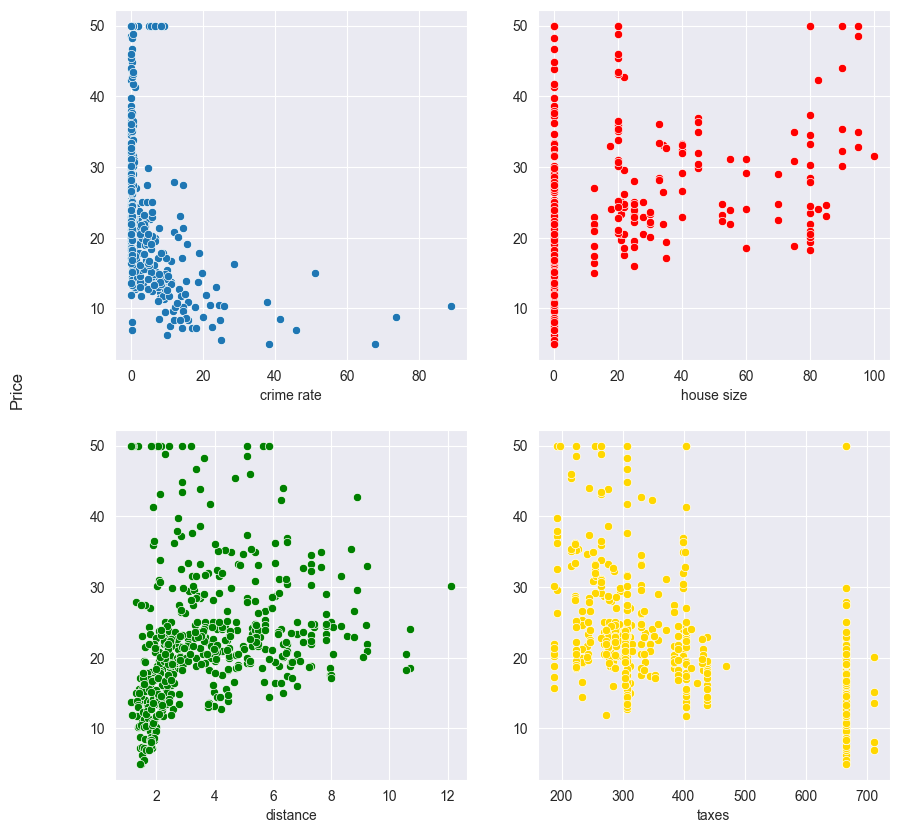

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
sns.scatterplot(data=housing_df, x="crim", y="medv", ax = ax[0,0]).set(ylabel=None)
ax[0,0].set(xlabel="crime rate")
sns.scatterplot(data=housing_df, x="size", y="medv", ax = ax[0,1], color="red").set(ylabel=None)
ax[0,1].set(xlabel="house size")
sns.scatterplot(data=housing_df, x="dis", y="medv", ax = ax[1,0], color="green").set(ylabel=None)
ax[1,0].set(xlabel="distance")
sns.scatterplot(data=housing_df, x="tax", y="medv", ax = ax[1,1], color="gold").set(ylabel=None)
ax[1,1].set(xlabel="taxes")
fig.supylabel("Price");

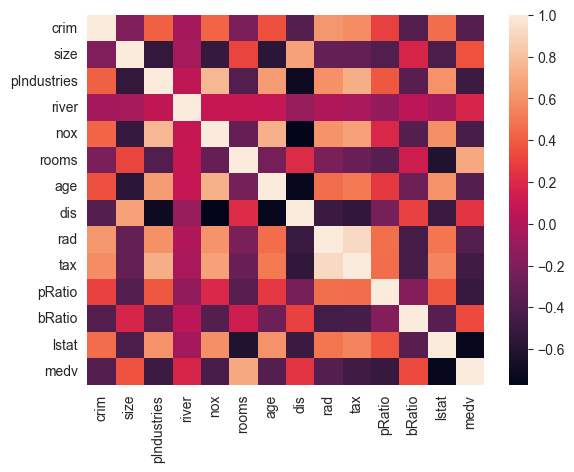

In [ ]:
sns.heatmap(housing_df.corr());

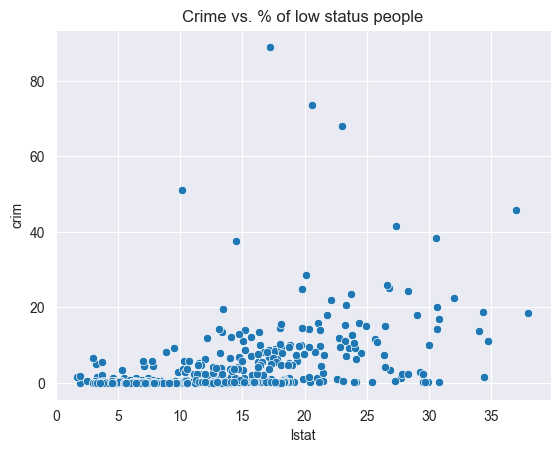

In [11]:
sns.scatterplot(data=housing_df, x='lstat', y='crim')
plt.title("Crime vs. % of low status people");

## Data analysis

In [15]:
scaler = StandardScaler()
scaler.fit(housing_df)
scaled_inputs = scaler.transform(housing_df)

# Data Processing

In [14]:
def RMSE(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [17]:
inputs = housing_df.loc[:, housing_df.columns!='medv']
targets = housing_df.medv
model = LinearRegression().fit(inputs, targets)
model

LinearRegression()

In [20]:
predicted = model.predict(inputs)
loss = RMSE(targets, predicted)
print('Loss:', loss)

Loss: 4.679191295697281


In [22]:
weights_df = pd.DataFrame({
    'feature': np.append(inputs.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
13,1,36.459488
5,rooms,3.809865
3,river,2.686734
8,rad,0.306049
1,size,0.046420
2,pIndustries,0.020559
11,bRatio,0.009312
6,age,0.000692
9,tax,-0.012335
0,crim,-0.108011


In [28]:
model.predict([inputs.iloc[20],inputs.iloc[30],inputs.iloc[55]])

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.52385753, 11.45511759, 31.15264947])

In [36]:
display(pd.DataFrame([housing_df.iloc[20],housing_df.iloc[30],housing_df.iloc[55]]))

,crim,size,pIndustries,river,nox,rooms,age,dis,rad,tax,pRatio,bRatio,lstat,medv
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02,13.6
30,1.13081,0.0,8.14,0.0,0.538,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60,12.7
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Loss: medv    8.306882
dtype: float64


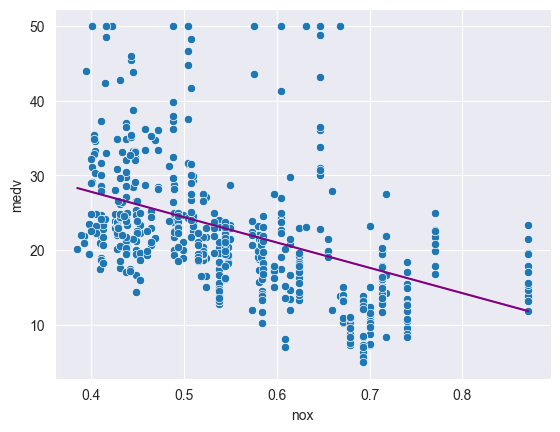

In [67]:
inputs = housing_df[["nox"]]
targets = housing_df[["medv"]]
model = LinearRegression().fit(inputs, targets)
predicted = model.predict(inputs)
loss = RMSE(targets, predicted)
print('Loss:', loss)
m = model.coef_
b = model.intercept_
model_predictions = m * inputs + b
sns.scatterplot(data=housing_df, x='nox', y='medv')
sns.lineplot(x=housing_df.nox, y=model_predictions.nox, color='purple');